## Исследование активности студентов в чатах 

### Цель проекта - проанализировать активность в чатах мессенджера Slack. 

Проблема – низкая обратная связь на важные посты, публикуемые в чатах

#### Задачи: 
- проанализировать поведение студентов в чатах; 
- выявить паттерны, динамику, цикличность в течение дня, недели, месяца, года; 
- визуализировать свои находки; 
- помочь нам понять, когда активность студентов в чатах наибольшая, и когда лучше публиковать посты/анонсы, чтобы получить больше откликов; 
- проанализировать различные типы каналов, когорт, групп; 
- оценить в каких общения больше, в каких меньше, и как они различаются от когорты к когорте, от канала к каналу. 

#### Откроем файл с данными и изучим общую информацию

In [1]:
# импорт библиотек

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt   
import pandas_profiling
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

import warnings                                           
warnings.filterwarnings('ignore') 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('C:\\Users\\GR\\Documents\\chat_data_clean.csv')

In [4]:
df.head(3)

Unnamed: 0                         client_msg_id     type         user  \
0           0  ae31e785-257b-4290-a4c6-9721337f67ea  message  U03JYMWQLP5   
1           1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d  message  U03V483FRKM   
2           2                                   NaN  message  U02KVQJHQ5S   

                ts     latest_reply       team        thread_ts       subtype  \
0 1,669,643,363.45 1,669,645,448.32  TPV9DP0N4 1,669,643,363.45           NaN   
1 1,669,645,448.32              NaN  TPV9DP0N4 1,669,643,363.45           NaN   
2 1,669,646,930.33              NaN        NaN              NaN  channel_join   

             channel   file_date  attachments  \
0  data-analysts-bus  2022-11-28            0   
1  data-analysts-bus  2022-11-28            0   
2  data-analysts-bus  2022-11-28            0   

                                                  reactions  text_len  \
0                                                       NaN       297   
1  [{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]       434   
2                                                       NaN        37   

   text_words  
0          47  
1          63  
2           5

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26533 non-null  int64  
 1   client_msg_id  18262 non-null  object 
 2   type           26533 non-null  object 
 3   user           23643 non-null  object 
 4   ts             26533 non-null  float64
 5   latest_reply   2303 non-null   float64
 6   team           15857 non-null  object 
 7   thread_ts      18222 non-null  float64
 8   subtype        8317 non-null   object 
 9   channel        26533 non-null  object 
 10  file_date      26533 non-null  object 
 11  attachments    26533 non-null  int64  
 12  reactions      4169 non-null   object 
 13  text_len       26533 non-null  int64  
 14  text_words     26533 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 3.0+ MB


In [6]:
# функция определения уникальных значений столбцов
def data_unique(data):
    for column in data.columns:
        print(f'Уникальные значения столбца {column}')
        print(data[column].unique())

In [7]:
# применение функции к датафрейму
data_unique(df)

Уникальные значения столбца Unnamed: 0
[    0     1     2 ... 26530 26531 26532]
Уникальные значения столбца client_msg_id
['ae31e785-257b-4290-a4c6-9721337f67ea'
 '7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d' nan ...
 'ac150123-309f-40ae-a787-f647ab4a76d9'
 'd7cdfd29-40a3-4f22-b3ce-755975902652'
 'b403e184-0a77-42ff-96ee-8813a06c387e']
Уникальные значения столбца type
['message']
Уникальные значения столбца user
['U03JYMWQLP5' 'U03V483FRKM' 'U02KVQJHQ5S' ... 'U045ZBAM1JA' 'U044T2TLGH3'
 'U04152HKDHN']
Уникальные значения столбца ts
[1.66964336e+09 1.66964545e+09 1.66964693e+09 ... 1.67060506e+09
 1.67448493e+09 1.67523912e+09]
Уникальные значения столбца latest_reply
[1.66964545e+09            nan 1.66971942e+09 ... 1.66998721e+09
 1.67009083e+09 1.67040193e+09]
Уникальные значения столбца team
['TPV9DP0N4' nan]
Уникальные значения столбца thread_ts
[1.66964336e+09            nan 1.66970929e+09 ... 1.66998651e+09
 1.67006971e+09 1.67037851e+09]
Уникальные значения столбца subtype
[nan 'chann

Посмотрим на количество уникальных записей в каждом столбце. Для этого напишем функцию data_unique_number и применим её к датафрейму.

In [8]:
# функция определения количества уникальных записей

def data_unique_number(data):
    for column in data.columns:
        print(f'Количество уникальных записей столбца {column}')
        print()
        print(data[column].value_counts())

In [9]:
# применение функции к датафрейму

data_unique_number(df)

Количество уникальных записей столбца Unnamed: 0

0        1
17685    1
17695    1
17694    1
17693    1
        ..
8842     1
8841     1
8840     1
8839     1
26532    1
Name: Unnamed: 0, Length: 26533, dtype: int64
Количество уникальных записей столбца client_msg_id

ae31e785-257b-4290-a4c6-9721337f67ea    1
1d7bbb29-e1b9-4869-97cd-dc2751b9a116    1
7fa882f4-f62c-49d2-bc9e-6421d003f149    1
7A947BF1-58CD-4B78-B0C8-4E775DDD5F9C    1
95f1af21-5e6e-432e-8352-d70f6a6f498c    1
                                       ..
03481781-D9FF-424A-9A44-085227EE33C3    1
686fb200-7d71-4ea4-bb40-a560df977335    1
2a8f9fee-244f-4737-a1c8-1334f6e4731a    1
9e7e6cc5-10d6-4ee1-9cba-0299a5df56d5    1
b403e184-0a77-42ff-96ee-8813a06c387e    1
Name: client_msg_id, Length: 18262, dtype: int64
Количество уникальных записей столбца type

message    26533
Name: type, dtype: int64
Количество уникальных записей столбца user

U02KVQJHQ5S    514
U03F5HNG351    252
U0179RY000Y    236
USWN6S8V6      215
U040FP9JRNF  

#### Сформируем pandas-profiling отчет

In [10]:
report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Предобработка данных

In [11]:
#Преобразуем отображение времени в сболбцах 

df['file_date'] = pd.to_datetime(df['file_date'], format='%Y-%m-%d %H:%M:%S')
df['ts'] = pd.to_datetime(df['ts'],unit='s').dt.round('1s')
df['thread_ts'] = pd.to_datetime (df['thread_ts'], unit='s').dt.round('1s')
df['latest_reply'] = pd.to_datetime (df['latest_reply'], unit='s').dt.round('1s')
df.dtypes

Unnamed: 0                int64
client_msg_id            object
type                     object
user                     object
ts               datetime64[ns]
latest_reply     datetime64[ns]
team                     object
thread_ts        datetime64[ns]
subtype                  object
channel                  object
file_date        datetime64[ns]
attachments               int64
reactions                object
text_len                  int64
text_words                int64
dtype: object

In [12]:
df.head(3)

Unnamed: 0                         client_msg_id     type         user  \
0           0  ae31e785-257b-4290-a4c6-9721337f67ea  message  U03JYMWQLP5   
1           1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d  message  U03V483FRKM   
2           2                                   NaN  message  U02KVQJHQ5S   

                   ts        latest_reply       team           thread_ts  \
0 2022-11-28 13:49:23 2022-11-28 14:24:08  TPV9DP0N4 2022-11-28 13:49:23   
1 2022-11-28 14:24:08                 NaT  TPV9DP0N4 2022-11-28 13:49:23   
2 2022-11-28 14:48:50                 NaT        NaN                 NaT   

        subtype            channel  file_date  attachments  \
0           NaN  data-analysts-bus 2022-11-28            0   
1           NaN  data-analysts-bus 2022-11-28            0   
2  channel_join  data-analysts-bus 2022-11-28            0   

                                                  reactions  text_len  \
0                                                       NaN       297   
1  [{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]       434   
2                                                       NaN        37   

   text_words  
0          47  
1          63  
2           5

In [13]:
# подсчёт явных дубликатов

df.duplicated().sum()

0

In [14]:
# подсчёт пропусков

df.isnull().sum().sort_values()

Unnamed: 0           0
type                 0
ts                   0
channel              0
file_date            0
attachments          0
text_len             0
text_words           0
user              2890
client_msg_id     8271
thread_ts         8311
team             10676
subtype          18216
reactions        22364
latest_reply     24230
dtype: int64

In [15]:
 df.isnull().sum().sort_values()/df.shape[0]*100

Unnamed: 0       0.00
type             0.00
ts               0.00
channel          0.00
file_date        0.00
attachments      0.00
text_len         0.00
text_words       0.00
user            10.89
client_msg_id   31.17
thread_ts       31.32
team            40.24
subtype         68.65
reactions       84.29
latest_reply    91.32
dtype: float64

In [16]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения в %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

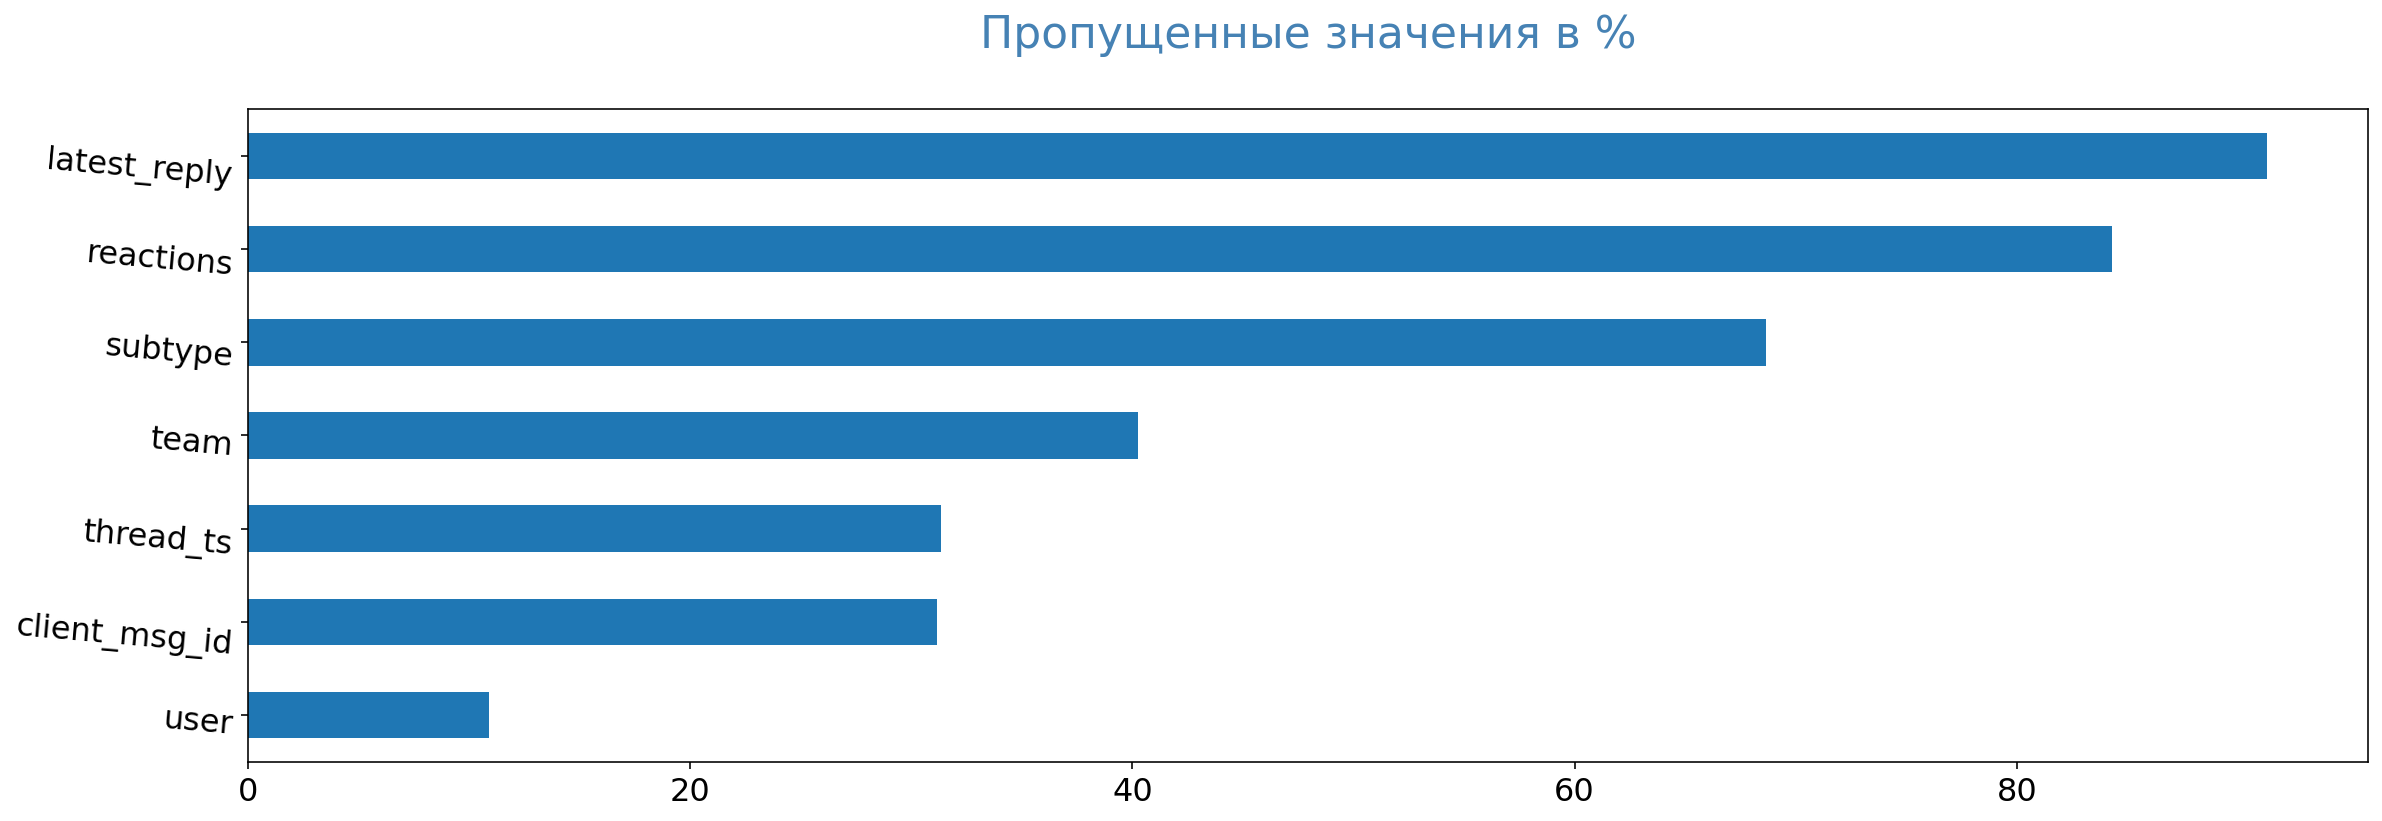

In [17]:
pass_value_barh(df)

Пока оставим пропуски в таком виде. Поработаем с датасетом, где есть все значения - user

In [18]:
#Функция выделения основных кaналов активности студентов

def channel_type(row):
     
        if 'info' in row:
            return 'info'
        elif 'exerciser' in row :
            return 'exerciser'
        elif 'projects' in row:
            return 'projects'
        elif 'teamwork' in row:
            return 'teamwork'
        elif 'library' in row:
            return 'library'
        elif 'masterskaya' in row:
            return 'masterskaya'
        else:
            return 'other'
        
df['channel_type'] = df['channel'].apply(channel_type)
df.head(3)       

Unnamed: 0                         client_msg_id     type         user  \
0           0  ae31e785-257b-4290-a4c6-9721337f67ea  message  U03JYMWQLP5   
1           1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d  message  U03V483FRKM   
2           2                                   NaN  message  U02KVQJHQ5S   

                   ts        latest_reply       team           thread_ts  \
0 2022-11-28 13:49:23 2022-11-28 14:24:08  TPV9DP0N4 2022-11-28 13:49:23   
1 2022-11-28 14:24:08                 NaT  TPV9DP0N4 2022-11-28 13:49:23   
2 2022-11-28 14:48:50                 NaT        NaN                 NaT   

        subtype            channel  file_date  attachments  \
0           NaN  data-analysts-bus 2022-11-28            0   
1           NaN  data-analysts-bus 2022-11-28            0   
2  channel_join  data-analysts-bus 2022-11-28            0   

                                                  reactions  text_len  \
0                                                       NaN       297   
1  [{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]       434   
2                                                       NaN        37   

   text_words channel_type  
0          47        other  
1          63        other  
2           5        other

In [19]:
# разделим по символу : и оставим последнее
df['number_of_reactions'] = df['reactions'].str.split(':').str[-1] 

# с помощью регулярного выражения извлечём числа и поместим в новую колонку таблицы
df['number_of_reactions'] = df['number_of_reactions'].str.replace(r'\D+','', regex=True) 

In [20]:
df.head(3)

Unnamed: 0                         client_msg_id     type         user  \
0           0  ae31e785-257b-4290-a4c6-9721337f67ea  message  U03JYMWQLP5   
1           1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d  message  U03V483FRKM   
2           2                                   NaN  message  U02KVQJHQ5S   

                   ts        latest_reply       team           thread_ts  \
0 2022-11-28 13:49:23 2022-11-28 14:24:08  TPV9DP0N4 2022-11-28 13:49:23   
1 2022-11-28 14:24:08                 NaT  TPV9DP0N4 2022-11-28 13:49:23   
2 2022-11-28 14:48:50                 NaT        NaN                 NaT   

        subtype            channel  file_date  attachments  \
0           NaN  data-analysts-bus 2022-11-28            0   
1           NaN  data-analysts-bus 2022-11-28            0   
2  channel_join  data-analysts-bus 2022-11-28            0   

                                                  reactions  text_len  \
0                                                       NaN       297   
1  [{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]       434   
2                                                       NaN        37   

   text_words channel_type number_of_reactions  
0          47        other                 NaN  
1          63        other                   1  
2           5        other                 NaN

In [21]:
df['number_of_reactions'].unique()

array([nan, '1', '2', '3', '4', '6', '17', '7', '5', '8', '12', '21',
       '11', '20', '29', '19', '10', '54', '16', '9', '27', '14', '26',
       '15', '13', '66', '38', '18'], dtype=object)

In [22]:
#Выделим когорты 

df["cohort"] = df["channel"].str.extract(r"_(\d+|\d+b)_")
df.head(3)

Unnamed: 0                         client_msg_id     type         user  \
0           0  ae31e785-257b-4290-a4c6-9721337f67ea  message  U03JYMWQLP5   
1           1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d  message  U03V483FRKM   
2           2                                   NaN  message  U02KVQJHQ5S   

                   ts        latest_reply       team           thread_ts  \
0 2022-11-28 13:49:23 2022-11-28 14:24:08  TPV9DP0N4 2022-11-28 13:49:23   
1 2022-11-28 14:24:08                 NaT  TPV9DP0N4 2022-11-28 13:49:23   
2 2022-11-28 14:48:50                 NaT        NaN                 NaT   

        subtype            channel  file_date  attachments  \
0           NaN  data-analysts-bus 2022-11-28            0   
1           NaN  data-analysts-bus 2022-11-28            0   
2  channel_join  data-analysts-bus 2022-11-28            0   

                                                  reactions  text_len  \
0                                                       NaN       297   
1  [{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]       434   
2                                                       NaN        37   

   text_words channel_type number_of_reactions cohort  
0          47        other                 NaN    NaN  
1          63        other                   1    NaN  
2           5        other                 NaN    NaN

In [23]:
df["cohort"].unique()

array([nan, '42', '50', '52', '53', '54', '55', '56b', '56', '58', '59b',
       '59', '60', '61b', '61', '62', '63', '02', '03', '04', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '8', '1',
       '22', '23', '24', '25', '26', '27', '28', '29', '2', '30', '3',
       '4', '5', '6', '7', '05', '06', '07', '35', '38', '40', '43', '44',
       '45', '46', '47', '48', '49', '51b', '54b', '57', '08'],
      dtype=object)

In [24]:
#Переименуем столбцы для удобства работы и удалим лишние

df.rename(columns={'client_msg_id': 'id_msg', 'type': 'type_post', 
                    'ts': 'dt_post', 'latest_reply': 'dt_reply', 
                    'thread_ts': 'dt_thread', 'subtype': 'action', 
                    'attachments': 'files', 'user': 'user_id' }, inplace = True)
df_1 = df.drop(['Unnamed: 0', 'reactions'], axis=1)

In [25]:
# добавим столбцы - час, день, месяц и год вопроса

df_1['day_post'] = df_1['dt_post'].dt.day_name()
df_1['month_post'] = df_1['dt_post'].dt.month_name()
df_1['year_post'] = df_1['dt_post'].dt.year
df_1['hour_post'] = pd.DatetimeIndex(df_1['dt_post']).hour
df_1.head(3)

id_msg type_post      user_id  \
0  ae31e785-257b-4290-a4c6-9721337f67ea   message  U03JYMWQLP5   
1  7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d   message  U03V483FRKM   
2                                   NaN   message  U02KVQJHQ5S   

              dt_post            dt_reply       team           dt_thread  \
0 2022-11-28 13:49:23 2022-11-28 14:24:08  TPV9DP0N4 2022-11-28 13:49:23   
1 2022-11-28 14:24:08                 NaT  TPV9DP0N4 2022-11-28 13:49:23   
2 2022-11-28 14:48:50                 NaT        NaN                 NaT   

         action            channel  file_date  files  text_len  text_words  \
0           NaN  data-analysts-bus 2022-11-28      0       297          47   
1           NaN  data-analysts-bus 2022-11-28      0       434          63   
2  channel_join  data-analysts-bus 2022-11-28      0        37           5   

  channel_type number_of_reactions cohort day_post month_post  year_post  \
0        other                 NaN    NaN   Monday   November       2022   
1        other                   1    NaN   Monday   November       2022   
2        other                 NaN    NaN   Monday   November       2022   

   hour_post  
0         13  
1         14  
2         14

### Анализ данных

In [26]:
#Сгруппируем студентов по ID, каналам, году, месяцу, дню и часу активности

df_2 = (
    df_1.groupby(['user_id', 'channel_type'])
    .agg({'type_post': 'count',
        'action': 'count',
          'hour_post': 'last',
         'day_post': 'last',
         'month_post': 'last',
         'year_post': 'last'})
    .reset_index()
)
df_2.head()

user_id channel_type  type_post  action  hour_post day_post month_post  \
0  U0104BRNQG1         info          1       0          9   Monday   November   
1  U0104BRNQG1        other          3       0          7   Monday   December   
2  U010AMJDQFQ         info         25       2         13  Tuesday   December   
3  U010AMJDQFQ     teamwork         14       3         13   Friday   December   
4  U010B36F543         info         12       1          8   Monday   December   

   year_post  
0       2022  
1       2022  
2       2022  
3       2022  
4       2022

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       7398 non-null   object
 1   channel_type  7398 non-null   object
 2   type_post     7398 non-null   int64 
 3   action        7398 non-null   int64 
 4   hour_post     7398 non-null   int64 
 5   day_post      7398 non-null   object
 6   month_post    7398 non-null   object
 7   year_post     7398 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 462.5+ KB


In [28]:
# вычислим процентное соотношение постов в каналах по месяцам

channel_month_segment = (df_2.groupby('channel_type')['month_post'].value_counts(normalize=True)
                 .apply(lambda x: x*100)).sort_values(ascending=False)

channel_month_segment

channel_type  month_post
projects      December     75.58
info          December     74.11
teamwork      December     73.84
exerciser     December     71.73
masterskaya   December     69.57
other         December     66.97
library       December     62.19
              November     37.81
other         November     33.03
exerciser     November     28.20
teamwork      November     26.09
masterskaya   November     26.09
info          November     25.77
projects      November     24.36
masterskaya   February      4.35
exerciser     February      0.07
teamwork      February      0.07
projects      January       0.07
info          October       0.06
              February      0.06
Name: month_post, dtype: float64

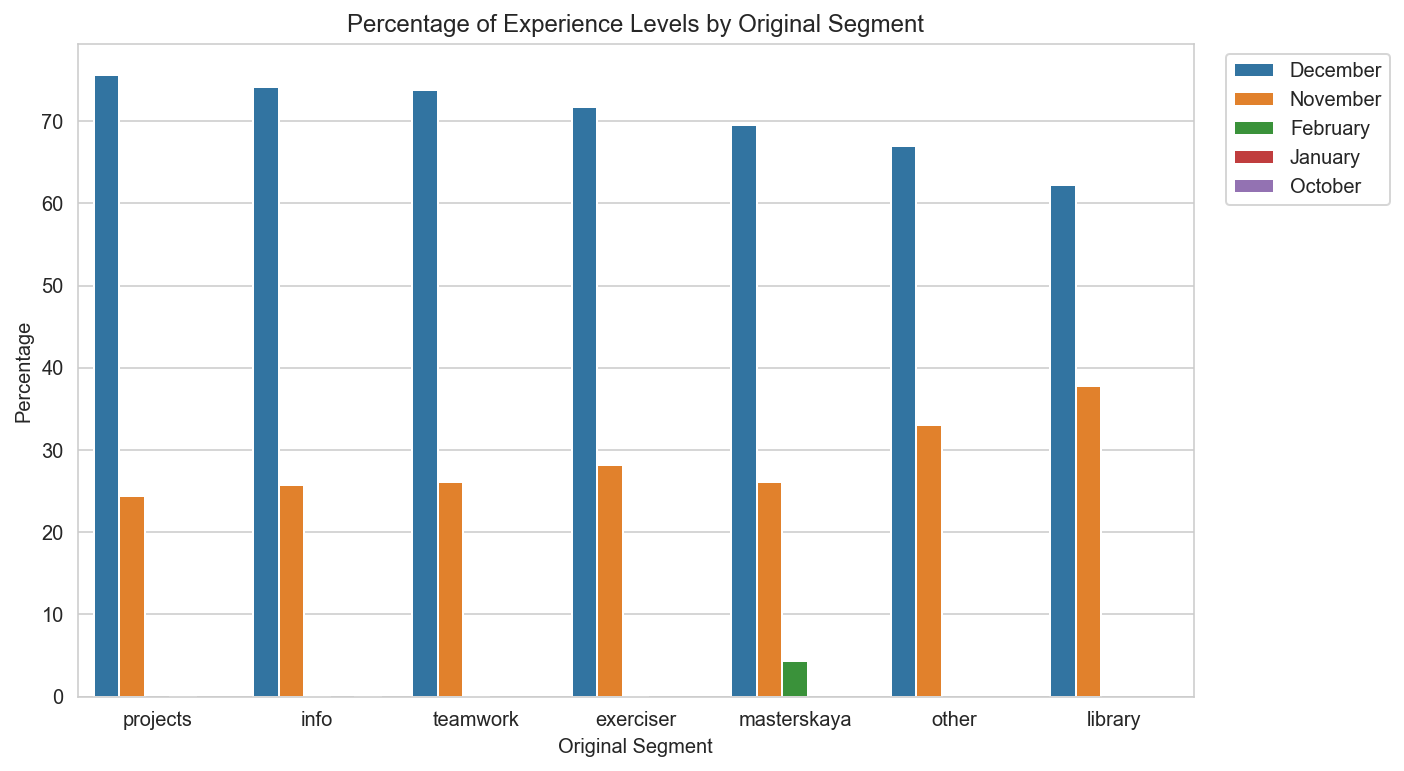

In [29]:
sns.set_style('whitegrid')

# Reset the index to turn the MultiIndex Series into a DataFrame
channel_segment_df = channel_month_segment.reset_index(name='percentage')
fig, ax = plt.subplots(figsize=(10, 6))
# Plot a bar plot
sns.barplot(data=channel_segment_df, x='channel_type', y='percentage', hue='month_post')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Original Segment')
plt.ylabel('Percentage')
plt.title('Percentage of Experience Levels by Original Segment')
plt.show()

В декабре наблюдается наибольшая активность студентов во всех каналах. В ноябре количество постов в 2 раза меньше. Видна ещё одна особенность - одновременноей повышение в ноябре активности в каналах masterskaya и library.

Наиболее активны каналы - projects, info, teamwork и exerciser

In [30]:
# вычислим процентное соотношение постов в каналах по дням недели

channel_day_segment = (df_2.groupby('channel_type')['day_post'].value_counts(normalize=True)
                 .apply(lambda x: x*100)).sort_values(ascending=False)

channel_day_segment

channel_type  day_post 
masterskaya   Monday      39.13
library       Monday      37.06
info          Monday      31.25
other         Monday      29.95
teamwork      Monday      29.35
exerciser     Monday      26.49
projects      Monday      24.97
other         Thursday    19.05
exerciser     Wednesday   18.23
masterskaya   Sunday      17.39
              Saturday    17.39
other         Tuesday     16.74
projects      Wednesday   16.42
library       Wednesday   16.04
projects      Tuesday     16.01
exerciser     Tuesday     15.92
info          Tuesday     15.29
library       Tuesday     15.05
exerciser     Thursday    14.43
teamwork      Tuesday     14.43
info          Friday      14.39
exerciser     Friday      13.69
other         Friday      13.67
teamwork      Friday      13.60
              Wednesday   13.32
projects      Thursday    13.16
              Friday      13.03
teamwork      Thursday    12.70
info          Thursday    12.52
library       Friday      12.31
info          We

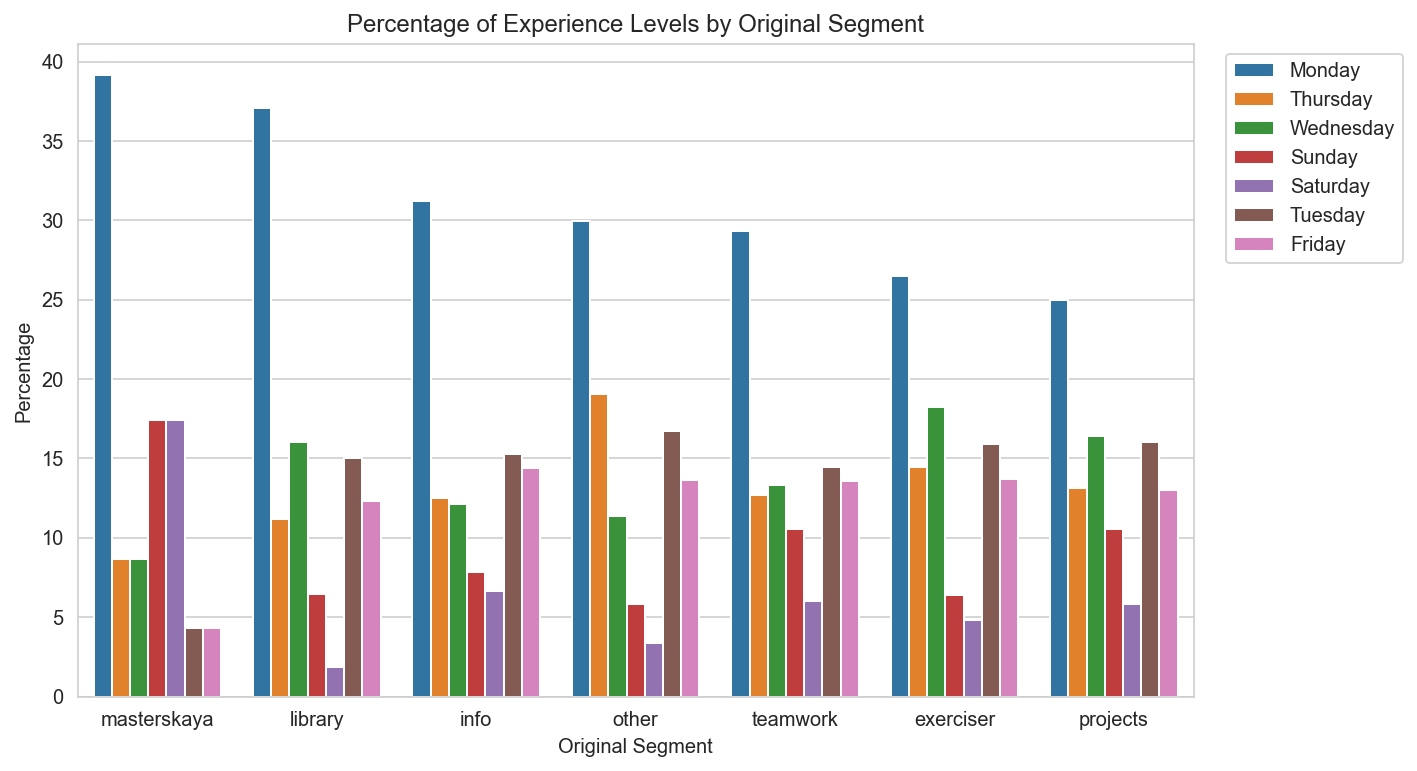

In [31]:
sns.set_style('whitegrid')

# Reset the index to turn the MultiIndex Series into a DataFrame
channel_segment_df1 = channel_day_segment.reset_index(name='percentage')
fig, ax = plt.subplots(figsize=(10, 6))
# Plot a bar plot
sns.barplot(data=channel_segment_df1, x='channel_type', y='percentage', hue='day_post')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Original Segment')
plt.ylabel('Percentage')
plt.title('Percentage of Experience Levels by Original Segment')
plt.show()

Самая высокая активность во всех каналах в понедельник. Во вторник и среду она заметно меньше, в четверг минимальная, а в пятницу снова возрастает.



In [32]:
# вычислим процентное соотношение постов в каналах по часам

channel_hour_segment = (df_2.groupby('channel_type')['hour_post'].value_counts(normalize=True)
                 .apply(lambda x: x*100)).sort_values(ascending=False)

channel_hour_segment

channel_type  hour_post
masterskaya   18          17.39
              12          17.39
library       9           16.04
masterskaya   19          13.04
              11          13.04
                           ... 
projects      1            0.14
              2            0.14
library       3            0.12
info          1            0.12
projects      3            0.07
Name: hour_post, Length: 148, dtype: float64

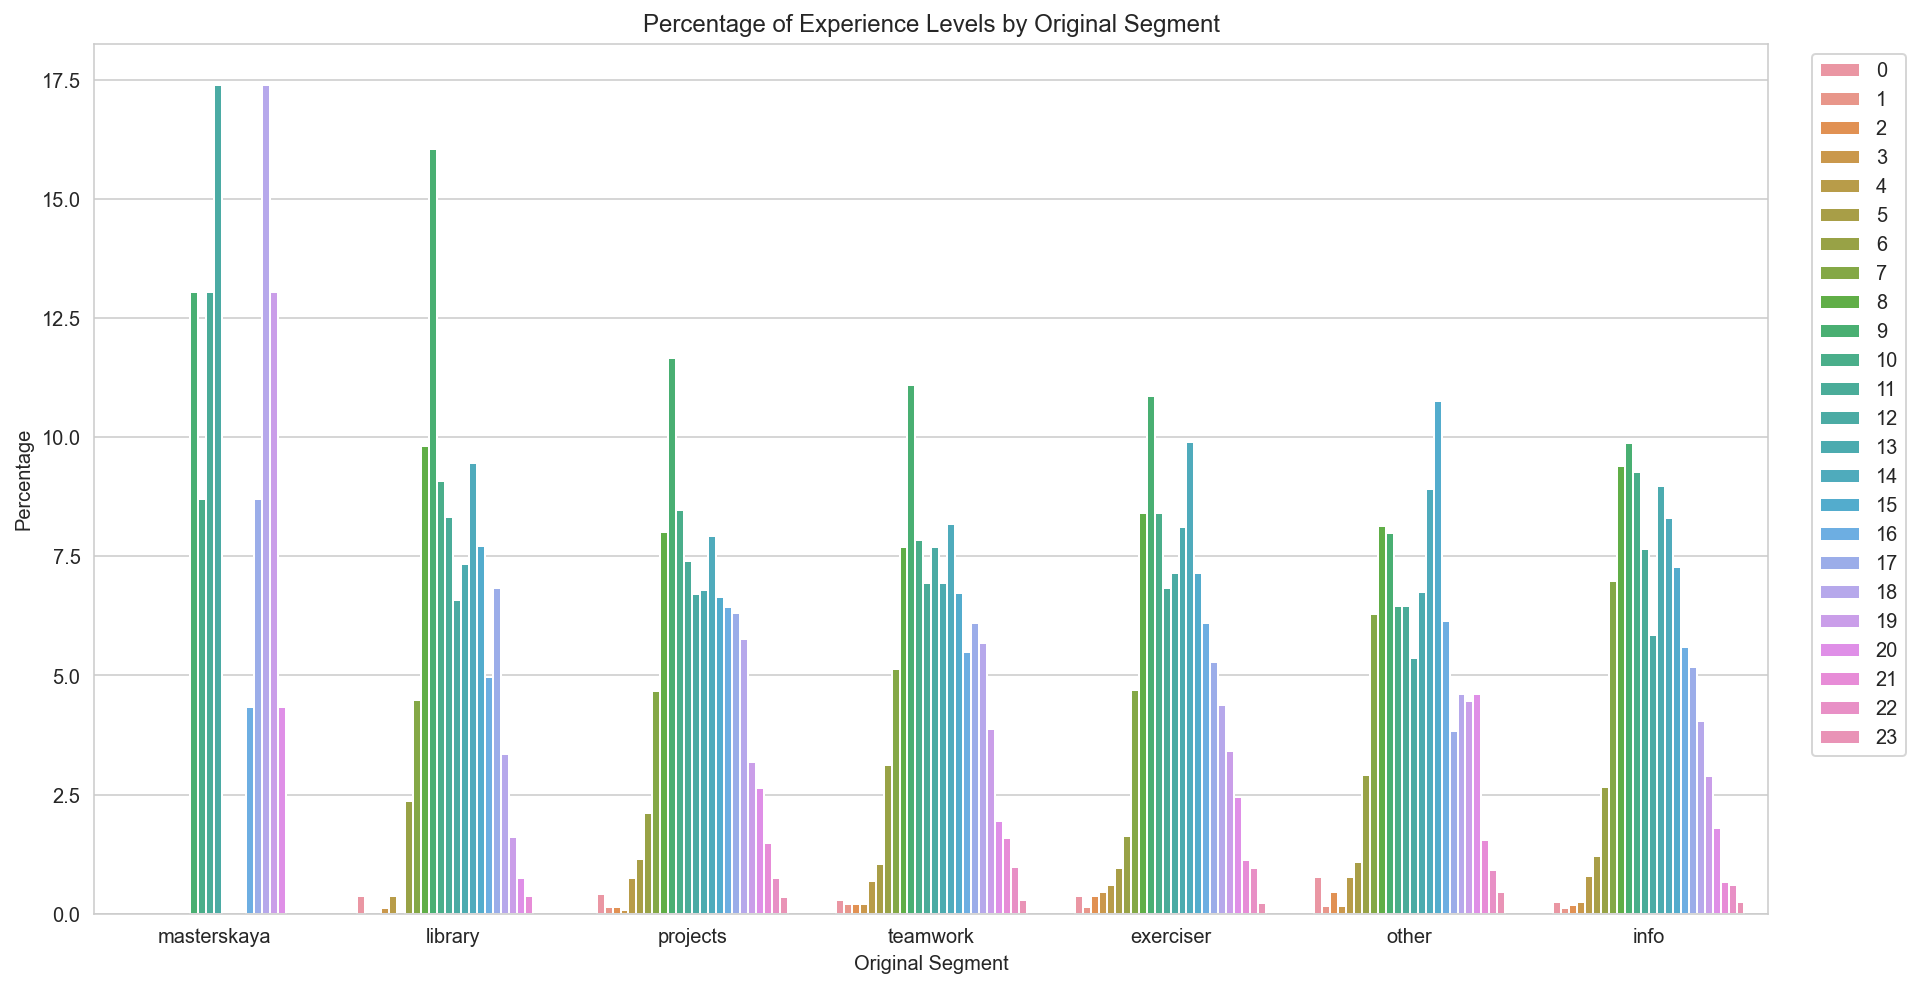

In [33]:
sns.set_style('whitegrid')

# Reset the index to turn the MultiIndex Series into a DataFrame
channel_segment_df1 = channel_hour_segment.reset_index(name='percentage')
fig, ax = plt.subplots(figsize=(15, 8))
# Plot a bar plot
sns.barplot(data=channel_segment_df1, x='channel_type', y='percentage', hue='hour_post')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Original Segment')
plt.ylabel('Percentage')
plt.title('Percentage of Experience Levels by Original Segment')
plt.show()

Пик активности сдудентов во всех основных каналах приходится на 8 часов утра. Также видим повышение активности в районе 14-15 часов дня. 

Отдельно отметим активность в канале - мастерская.

In [34]:
#Сгруппируем студентов по активности в каждом канале

df_3 = df_2.pivot_table( index= 'channel_type', \
                                   columns = 'hour_post', values = 'user_id', aggfunc = 'count') \
                             .reset_index() 
df_3

hour_post channel_type    0    1    2    3     4     5     6      7      8  \
0            exerciser 5.00 2.00 5.00 6.00  8.00 13.00 22.00  63.00 113.00   
1                 info 4.00 2.00 3.00 4.00 13.00 20.00 44.00 116.00 156.00   
2              library 3.00  NaN  NaN 1.00  3.00   NaN 19.00  36.00  79.00   
3          masterskaya  NaN  NaN  NaN  NaN   NaN   NaN   NaN    NaN    NaN   
4                other 5.00 1.00 3.00 1.00  5.00  7.00 19.00  41.00  53.00   
5             projects 6.00 2.00 2.00 1.00 11.00 17.00 31.00  69.00 118.00   
6             teamwork 4.00 3.00 3.00 3.00 10.00 15.00 45.00  74.00 111.00   

hour_post  ...     14     15    16    17    18    19    20    21    22   23  
0          ... 133.00  96.00 82.00 71.00 59.00 46.00 33.00 15.00 13.00 3.00  
1          ... 138.00 121.00 93.00 86.00 67.00 48.00 30.00 11.00 10.00 4.00  
2          ...  76.00  62.00 40.00 55.00 27.00 13.00  6.00  3.00   NaN  NaN  
3          ...    NaN    NaN  1.00  2.00  4.00  3.00  1.00   NaN   NaN  NaN  
4          ...  58.00  70.00 40.00 25.00 30.00 29.00 30.00 10.00  6.00 3.00  
5          ... 117.00  98.00 95.00 93.00 85.00 47.00 39.00 22.00 11.00 5.00  
6          ... 118.00  97.00 79.00 88.00 82.00 56.00 28.00 23.00 14.00 4.00  

[7 rows x 25 columns]

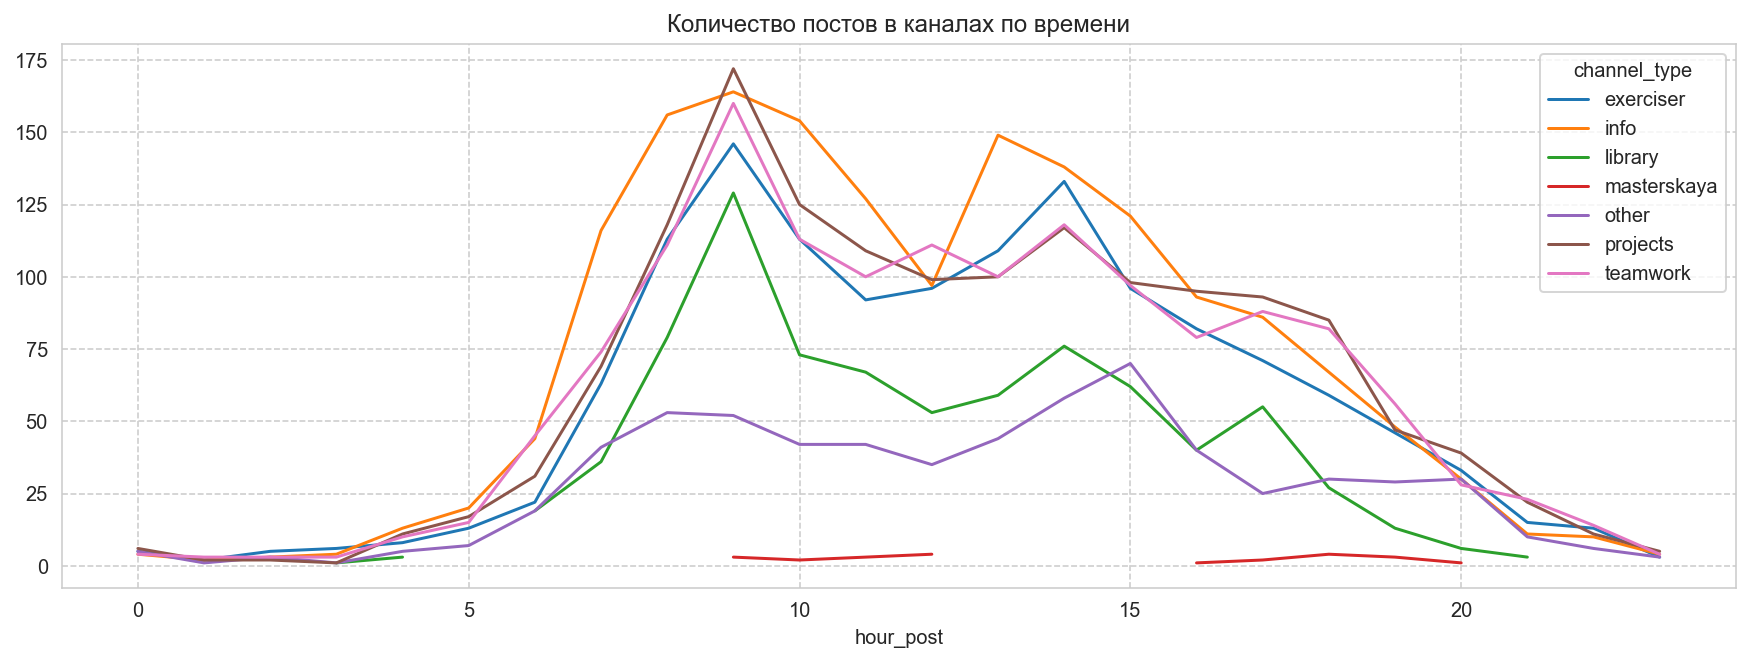

In [35]:
#Проверим распределение количества постов по основным каналам в течение дня 

df_2[df_2['user_id'].notna()]\
    .pivot_table(index= 'hour_post',
                columns='channel_type',
                values='user_id',
                aggfunc='count')\
    .plot(title='Количество постов в каналах по времени', kind='line', figsize=(15, 5))

plt.grid(ls='--')
print()

 Наибольшее число студентов заходит в каналы около 8-9 часов утра, затем спад активности и новый пик около 13-14 часов дня.

In [36]:
#Сгруппируем метки активности студентов по основным каналам

df_act = df_2.groupby(['channel_type'])['action'].count() \
                .reset_index().sort_values(by='action', ascending= False)
df_act

channel_type  action
1         info    1661
5     projects    1474
6     teamwork    1441
0    exerciser    1344
2      library     804
4        other     651
3  masterskaya      23

In [37]:
fig = px.bar(df_act, x='channel_type', y='action',\
             title='Распределение активности в каналах')
fig.update_layout(xaxis_title='Канал',
                   yaxis_title='Количество постов и реакций', xaxis={'categoryorder':'total descending'})
fig.show()

По убыванию активность в каналах распределяется так - info, project, teamwork, exerciser

In [38]:
#Объединим датасеты 

df_time = df_act.merge(df_2,how='outer',on=['channel_type', 'action'])
df_time.head()

channel_type  action user_id  type_post  hour_post day_post month_post  \
0         info    1661     NaN        NaN        NaN      NaN        NaN   
1     projects    1474     NaN        NaN        NaN      NaN        NaN   
2     teamwork    1441     NaN        NaN        NaN      NaN        NaN   
3    exerciser    1344     NaN        NaN        NaN      NaN        NaN   
4      library     804     NaN        NaN        NaN      NaN        NaN   

   year_post  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [39]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7405 entries, 0 to 7404
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_type  7405 non-null   object 
 1   action        7405 non-null   int64  
 2   user_id       7398 non-null   object 
 3   type_post     7398 non-null   float64
 4   hour_post     7398 non-null   float64
 5   day_post      7398 non-null   object 
 6   month_post    7398 non-null   object 
 7   year_post     7398 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 520.7+ KB


In [40]:
#Сгруппируем датасет по дням недели  

df_time['day'] = df['dt_post'].dt.day_name() 

df_time['total_post'] = True

df_post_week = df_time.groupby(by='day').agg(sum).transpose()
df_post_week

day              Friday       Monday   Saturday       Sunday     Thursday  \
action           581.00     5,915.00     305.00       451.00       696.00   
type_post      2,632.00     7,306.00     934.00     2,718.00     2,622.00   
hour_post      9,604.00    27,188.00   5,935.00     9,001.00    12,413.00   
year_post  1,583,229.00 4,420,093.00 970,560.00 1,500,324.00 2,036,154.00   
total_post       783.00     2,189.00     480.00       742.00     1,007.00   

day             Tuesday    Wednesday  
action         3,556.00     1,321.00  
type_post      3,699.00     3,732.00  
hour_post     13,099.00    13,989.00  
year_post  2,157,474.00 2,290,927.00  
total_post     1,071.00     1,133.00

In [41]:
df_post_week.describe()

day         Friday       Monday   Saturday       Sunday     Thursday  \
count         5.00         5.00       5.00         5.00         5.00   
mean    319,365.80   892,538.20 195,642.80   302,647.20   410,578.40   
std     706,530.54 1,971,987.09 433,198.17   669,530.55   908,737.10   
min         581.00     2,189.00     305.00       451.00       696.00   
25%         783.00     5,915.00     480.00       742.00     1,007.00   
50%       2,632.00     7,306.00     934.00     2,718.00     2,622.00   
75%       9,604.00    27,188.00   5,935.00     9,001.00    12,413.00   
max   1,583,229.00 4,420,093.00 970,560.00 1,500,324.00 2,036,154.00   

day        Tuesday    Wednesday  
count         5.00         5.00  
mean    435,779.80   462,220.40  
std     962,467.27 1,022,291.63  
min       1,071.00     1,133.00  
25%       3,556.00     1,321.00  
50%       3,699.00     3,732.00  
75%      13,099.00    13,989.00  
max   2,157,474.00 2,290,927.00

In [42]:
#Сгруппируем датасет по месяцам 

df_time['month'] = df['dt_post'].dt.month_name() 

df_time['total_post'] = True

df_post_month = df_time.groupby(by='month').agg(sum).transpose()
df_post_month

month           December     November
action          4,114.00     8,711.00
type_post      16,023.00     7,620.00
hour_post      63,400.00    27,829.00
year_post  10,346,579.00 4,612,182.00
total_post      5,117.00     2,288.00

In [43]:
#Посмотрим на длину строк и количество слов в постах по каналам

df_4 = (
    df_1.groupby(['channel_type'])
    .agg({'type_post': 'count',
        'text_words': 'median',
          'text_len': 'mean'})
    .reset_index().sort_values(by='type_post',ascending=False)
)
df_4.head()

channel_type  type_post  text_words  text_len
5     projects       7336       15.00    171.64
0    exerciser       6839       13.00    150.84
6     teamwork       4285       10.00    140.90
1         info       3864        8.00    188.91
4        other       3119        9.00    140.37

In [44]:
corr = df_4[['channel_type',\
           'type_post',\
           'text_words',\
           'text_len']].corr() 
corr.style.background_gradient(cmap='coolwarm') 

In [45]:
#Сгруппируем студентов по когортам, каналам, активности и времени

df_cohort = (
    df_1.groupby(['cohort', 'channel_type'])
    .agg({'type_post': 'count',
        'action': 'count',
          'hour_post': 'last',
         'day_post': 'last',
         'month_post': 'last',
         'year_post': 'last'})
    .reset_index()
)
df_cohort.head()

cohort channel_type  type_post  action  hour_post  day_post month_post  \
0     02    exerciser         98      95         10    Monday   December   
1     02         info         32       6         13  Thursday   December   
2     02      library          2       2          6    Monday   December   
3     02        other        119       4          6    Monday   December   
4     02     projects         31      31          6    Monday   December   

   year_post  
0       2022  
1       2022  
2       2022  
3       2022  
4       2022

In [46]:
fig = px.bar(df_cohort, x='channel_type', y='cohort',\
             title='Распределение активности в каналах по когортам')
fig.update_layout(xaxis_title='Канал',
                   yaxis_title='Номер когорты', xaxis={'categoryorder':'total descending'})
fig.show()

По убыванию активность когорт в каналах распределяется так - info, exerciser, project, library, teamwork 

In [47]:
#Сгруппируем метки активности в когортах по основным каналам

df_act_cohort = df_cohort.groupby(['cohort'])['action'].count() \
                .reset_index().sort_values(by='action', ascending= False)

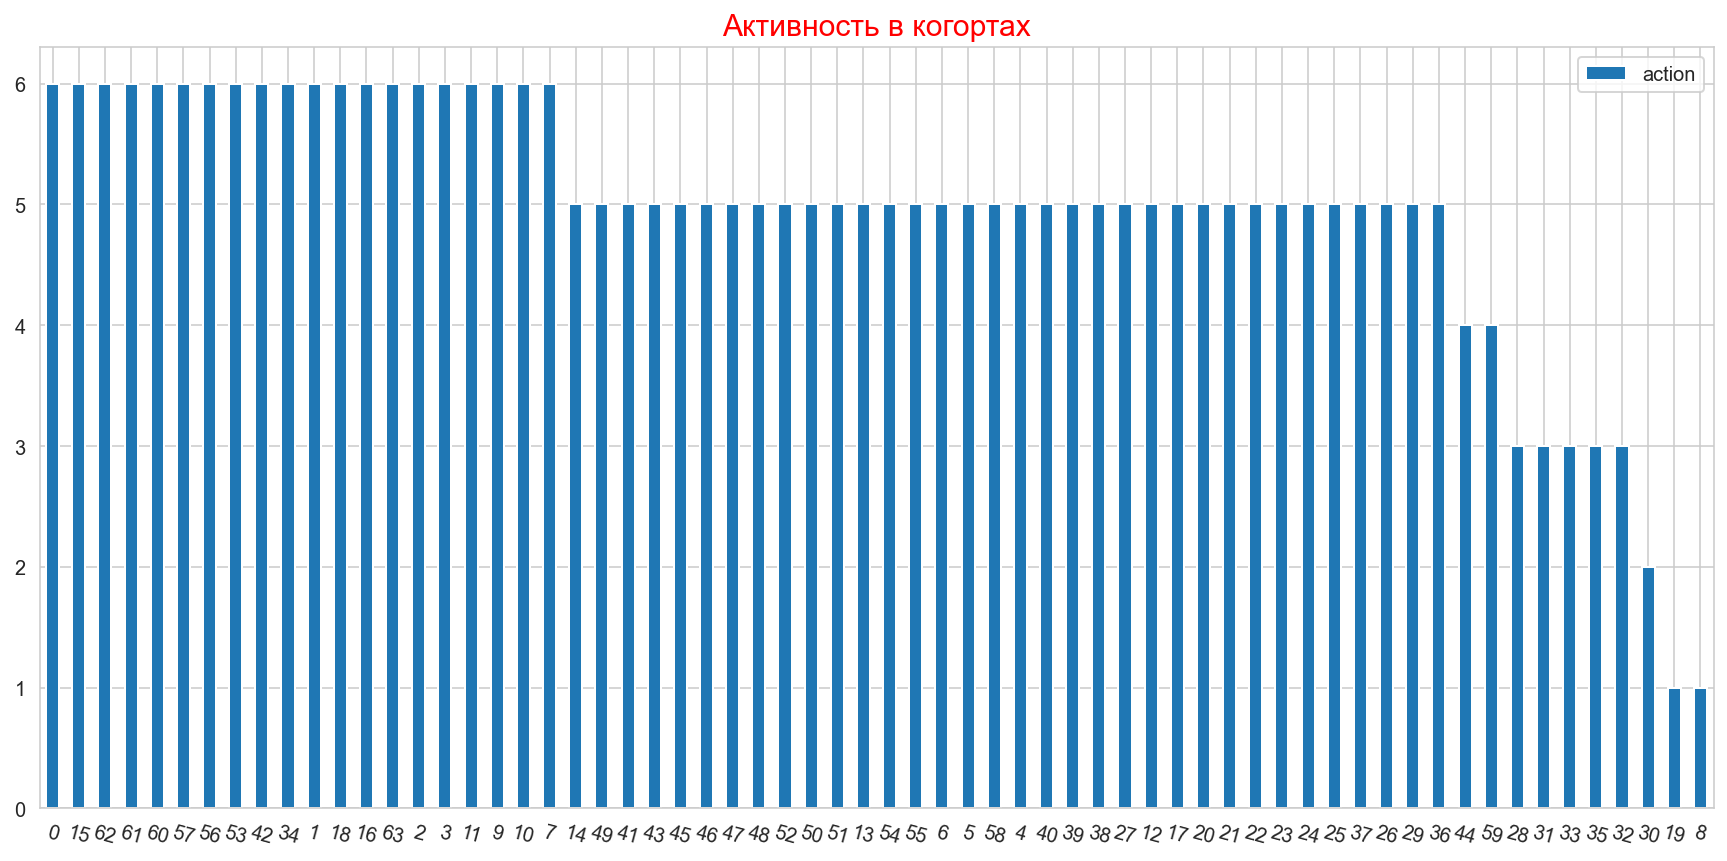

In [48]:
df_act_cohort.plot.bar(rot = -15, figsize=(15, 7)).set_title('Активность в когортах', fontsize = 15, color = 'red')
plt.show()

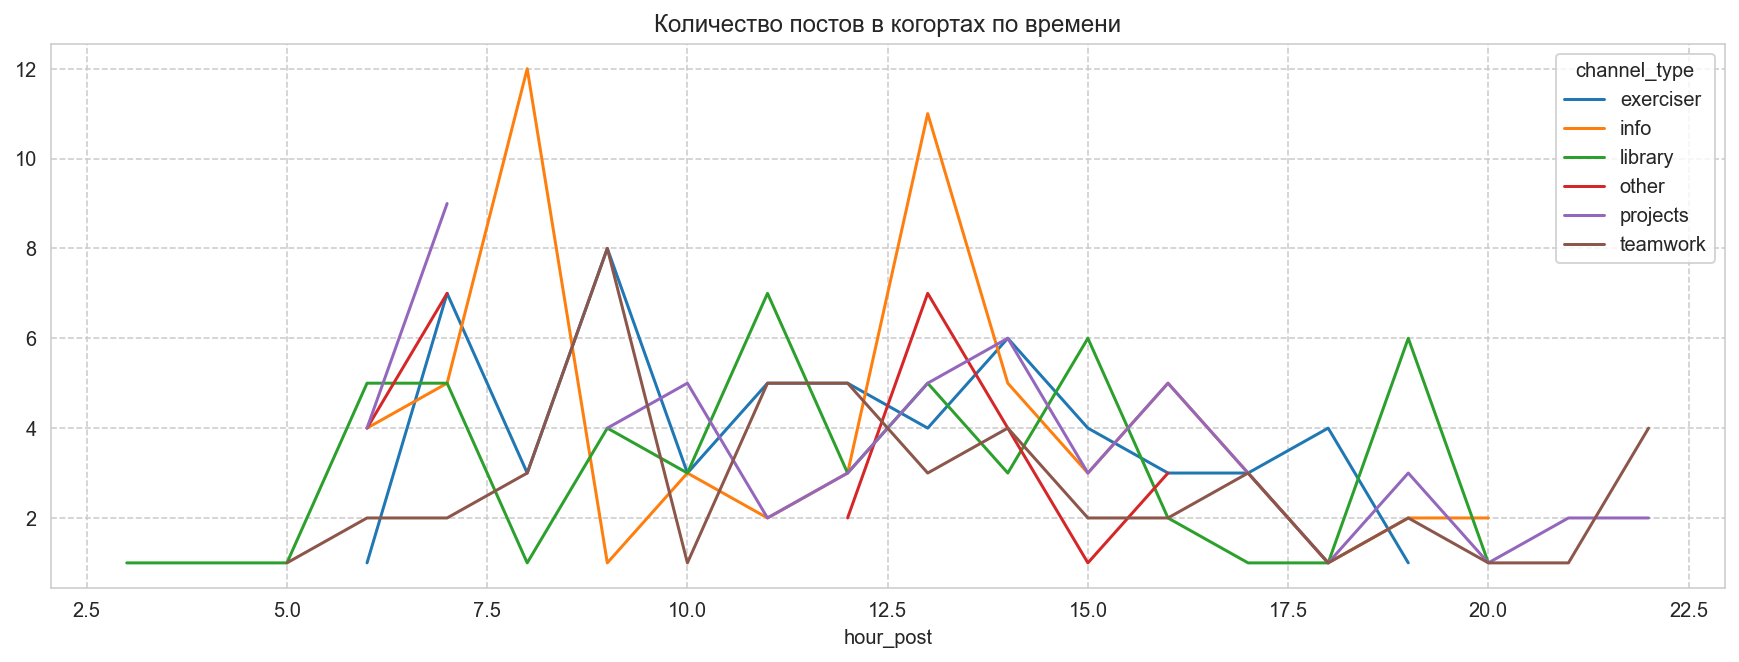

In [49]:
#Проверим распределение количества постов в когортах по основным каналам и часам 

df_cohort[df_cohort['type_post'].notna()]\
    .pivot_table(index= 'hour_post',
                columns='channel_type',
                values='type_post',
                aggfunc='count')\
    .plot(title='Количество постов в когортах по времени', kind='line', figsize=(15, 5))

plt.grid(ls='--')
print()

Пики активности постов в когортах наблюдаем около 8-9 утра и 13-14 дня

Text(0.5, 1.0, 'Активность когорт по времени суток')

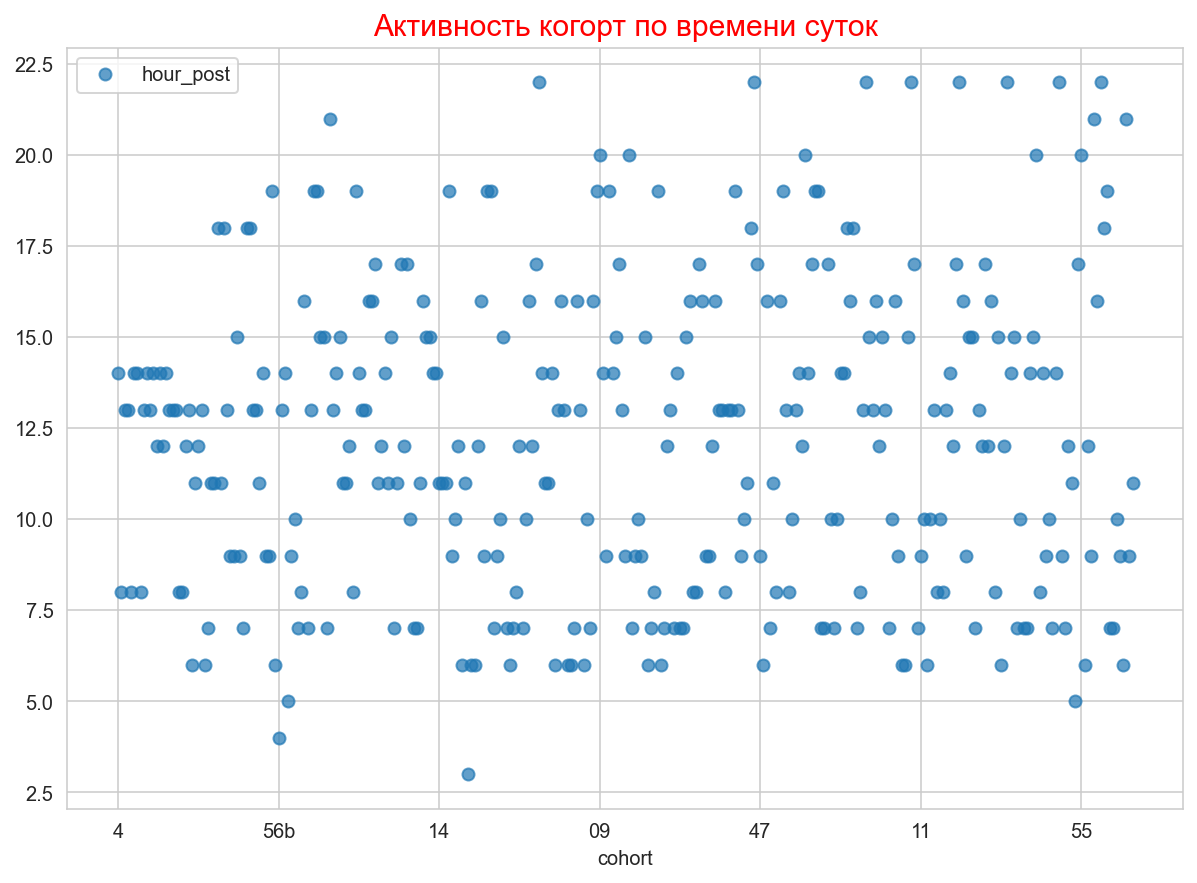

In [50]:
#Проверим распределение количества постов в когортах по времени суток 

df_cohort.sort_values('type_post')\
.plot(x='cohort', y='hour_post',grid=True, style= 'o', figsize=(10, 7), alpha= 0.7)\
.set_title('Активность когорт по времени суток', fontsize = 15, color = 'red')


По когортам активность студентов выше около 7 часов утра и 13-14 часов дня.

### Выводы:


- В декабре наблюдается наибольшая активность студентов во всех каналах. При этом, в ноябре количество постов в 2 раза меньше.

- Наиболее активны каналы - projects, info, teamwork и exerciser
- Самая высокая активность во всех каналах в понедельник. Во вторник и среду она заметно меньше, в четверг минимальная, а в пятницу снова возрастает.
- Пик активности сдудентов во всех основных каналах приходится на 8 часов утра. Также видим повышение активности в районе 14-15 часов дня.
- Наибольшее число студентов заходит в каналы около 8-9 часов утра, затем спад активности и новый пик около 13-14 часов дня.
- По убыванию, активность в каналах распределяется так - info, project, teamwork, exerciser
- По убыванию, активность когорт в каналах распределяется так - info, exerciser, project, library, teamwork 
- Пики активности постов в когортах наблюдаем около 8-9 утра и 13-14 дня
- По когортам активность студентов выше около 7 часов утра и 13-14 часов дня.

### Рекомендации:

1. Чтобы получить больше откликов, публиковать посты/анонсы лучше в понедельник и пятницу около 8 утра и 13 дня.
2. Чтоб была массовая реакция на посты, надо сказать студентам - кто ставит лайк, у того ревью проектов будет более мягким)